In [17]:
# Minimalist Function Space Visualization for Presentation Slides
# Similar style to conference_presentation_pli but simplified for clarity

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the style to match conference_presentation_pli
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Configuration
FIGSIZE = (10, 6)  # Standard figure size for slides
DPI = 300
SAVE_DIR = "conference_presentation_figures/simple_functions"
os.makedirs(SAVE_DIR, exist_ok=True)

# Domain setup
x = np.linspace(0, 1, 1000)  # High resolution for smooth curves

print("🎨 Function Space Visualization Setup Complete")
print(f"📁 Figures will be saved in: {SAVE_DIR}")
print("🔧 Ready to generate minimalist function plots for presentation")

🎨 Function Space Visualization Setup Complete
📁 Figures will be saved in: conference_presentation_figures/simple_functions
🔧 Ready to generate minimalist function plots for presentation


In [ ]:
def generate_smooth_functions(x):
    """Generate smooth function examples for model space."""
    functions = {}

    # Smooth polynomial-like functions
    functions['constant'] = np.ones_like(x) * 0.5
    functions['linear'] = 2 * x - 0.5
    functions['quadratic'] = 4 * x * (1 - x)  # Parabola that's 0 at boundaries
    functions['cubic'] = 16 * x**2 * (1 - x)  # More complex smooth function
    functions['sine'] = np.sin(2 * np.pi * x)
    functions['double_sine'] = np.sin(4 * np.pi * x) * 0.7
    functions['gaussian_bump'] = np.exp(-50 * (x - 0.5)**2)
    functions['two_bumps'] = (np.exp(-100 * (x - 0.3)**2) +
                             np.exp(-100 * (x - 0.7)**2)) * 0.8

    return functions


def generate_oscillatory_functions(x):
    """Generate oscillatory function examples."""
    functions = {}

    functions['low_freq'] = np.sin(3 * np.pi * x)
    functions['medium_freq'] = np.sin(8 * np.pi * x) * 0.6
    functions['high_freq'] = np.sin(15 * np.pi * x) * 0.4
    functions['mixed_freq'] = (np.sin(2 * np.pi * x) +
                              0.3 * np.sin(10 * np.pi * x))
    functions['damped_oscillation'] = np.exp(-3 * x) * np.sin(8 * np.pi * x)

    return functions


def generate_heart_function(x, n_param=2000, scale=1.0):
    """Generate a heart-shaped function sampled on the domain of x.

    This uses the classic parametric heart curve (t in [0,2*pi]) and
    re-maps the parametric x-coordinates to the notebook's x grid using
    interpolation. The result is a 1D function y(x) that resembles a heart
    silhouette when plotted.
    """
    # Parametric heart curve (classic integer-coefficient form)
    t = np.linspace(0, 2 * np.pi, n_param)
    hx = 16 * np.sin(t)**3
    hy = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

    # Normalize hx to [0, 1] so it maps to the notebook domain
    hx_norm = (hx - hx.min()) / (hx.max() - hx.min())

    # Normalize hy to [0, 1] for a clean plotted curve; allow simple scaling
    hy_norm = (hy - hy.min()) / (hy.max() - hy.min())

    # Sort by the parametric x to make interpolation well-defined
    order = np.argsort(hx_norm)
    hx_s = hx_norm[order]
    hy_s = hy_norm[order]

    # For any target x points, interpolate the heart silhouette
    y = np.interp(x, hx_s, hy_s)

    # Apply optional scaling and small vertical offset so the heart sits nicely
    y = 0.9 * y * scale + 0.05

    return y


def generate_localized_functions(x):
    """Generate localized function examples (bump functions)."""
    functions = {}

    # Different width bumps
    functions['narrow_bump'] = np.exp(-200 * (x - 0.5)**2)
    functions['medium_bump'] = np.exp(-50 * (x - 0.5)**2)
    functions['wide_bump'] = np.exp(-10 * (x - 0.5)**2)

    # Different locations
    functions['left_bump'] = np.exp(-80 * (x - 0.2)**2)
    functions['right_bump'] = np.exp(-80 * (x - 0.8)**2)

    # Multiple bumps
    functions['three_bumps'] = (np.exp(-150 * (x - 0.2)**2) +
                               np.exp(-150 * (x - 0.5)**2) +
                               np.exp(-150 * (x - 0.8)**2)) * 0.7

    # Add the heart-shaped function as a localized, decorative example
    try:
        functions['heart'] = generate_heart_function(x)
    except Exception:
        # In the unlikely event interpolation fails, fall back to a medium bump
        functions['heart'] = np.exp(-50 * (x - 0.5)**2)

    return functions

print("✅ Function generators created:")
print("   📊 Smooth functions (polynomials, Gaussians)")
print("   🌊 Oscillatory functions (various frequencies)")
print("   📍 Localized functions (bump functions)")

✅ Function generators created:
   📊 Smooth functions (polynomials, Gaussians)
   🌊 Oscillatory functions (various frequencies)
   📍 Localized functions (bump functions)


In [19]:
# Ultra-minimalist configuration for PowerPoint
MINIMAL_FIGSIZE = (4, 3)  # Smaller size for PowerPoint elements
MINIMAL_DPI = 150  # Good quality but not huge files
MINIMAL_SAVE_DIR = "minimal_functions"
os.makedirs(MINIMAL_SAVE_DIR, exist_ok=True)

def plot_minimal_function(x, y, filename, color='tab:blue', linewidth=3):
    """
    Create ultra-minimalist function plot for PowerPoint:
    - No axes, no labels, no titles, no grid
    - Transparent background
    - Just the function curve
    - Small size for easy import to PowerPoint
    """
    fig, ax = plt.subplots(figsize=MINIMAL_FIGSIZE, facecolor='none')

    # Plot only the function curve
    ax.plot(x, y, color=color, linewidth=linewidth, alpha=0.9)

    # Remove everything except the plot
    ax.set_xlim(0, 1)

    # Calculate reasonable y-limits with some padding
    y_margin = 0.05 * (np.max(y) - np.min(y)) if np.max(y) != np.min(y) else 0.1
    ax.set_ylim(np.min(y) - y_margin, np.max(y) + y_margin)

    # Remove all visual elements except the line
    ax.axis('off')  # Remove axes, ticks, labels
    ax.set_facecolor('none')  # Transparent background

    # Remove any padding around the plot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Save with transparent background
    filepath = os.path.join(MINIMAL_SAVE_DIR, filename)
    plt.savefig(filepath, dpi=MINIMAL_DPI, bbox_inches='tight',
                facecolor='none', edgecolor='none', transparent=True, pad_inches=0)

    print(f"   💾 Minimal: {filename}")

    return fig

print("🎯 Ultra-minimalist plotting function created:")
print("   • No axes, labels, titles, or grids")
print("   • Transparent background")
print("   • Small size optimized for PowerPoint")
print("   • Individual PNG files for easy import")

🎯 Ultra-minimalist plotting function created:
   • No axes, labels, titles, or grids
   • Transparent background
   • Small size optimized for PowerPoint
   • Individual PNG files for easy import


In [20]:
# Generate ultra-minimalist function plots for PowerPoint
print("🎨 Creating ultra-minimalist function plots...")
print("=" * 60)

# Single color for all plots per user request
colors = ['tab:blue']

print("\n📊 Smooth functions...")
color_idx = 0
for name, y in smooth_funcs.items():
    color = colors[color_idx % len(colors)]
    fig = plot_minimal_function(x, y, f'minimal_{name}.png', color=color)
    plt.close(fig)
    color_idx += 1

print("\n🌊 Oscillatory functions...")
for name, y in oscillatory_funcs.items():
    color = colors[color_idx % len(colors)]
    fig = plot_minimal_function(x, y, f'minimal_{name}.png', color=color)
    plt.close(fig)
    color_idx += 1

print("\n📍 Localized functions...")
for name, y in localized_funcs.items():
    color = colors[color_idx % len(colors)]
    fig = plot_minimal_function(x, y, f'minimal_{name}.png', color=color)
    plt.close(fig)
    color_idx += 1

# Create a few additional interesting combinations
print("\n✨ Special combinations...")

# Linear combination example
combination = 0.6 * smooth_funcs['sine'] + 0.4 * smooth_funcs['quadratic']
fig = plot_minimal_function(x, combination, 'minimal_combination1.png', color='tab:blue')
plt.close(fig)

# Mixed frequency
mixed = 0.7 * oscillatory_funcs['low_freq'] + 0.3 * oscillatory_funcs['high_freq']
fig = plot_minimal_function(x, mixed, 'minimal_combination2.png', color='tab:blue')
plt.close(fig)

# Bump with oscillation
bump_osc = smooth_funcs['gaussian_bump'] * 0.8 + oscillatory_funcs['medium_freq'] * 0.2
fig = plot_minimal_function(x, bump_osc, 'minimal_combination3.png', color='tab:blue')
plt.close(fig)

print(f"\n✅ All minimal functions generated!")
print(f"📁 Check '{MINIMAL_SAVE_DIR}' folder for PNG files")
print("🎯 Ready for PowerPoint import!")
print("\n💡 Usage tips:")
print("   • Import all PNGs into PowerPoint at once")
print("   • Resize and position as needed")
print("   • Transparent background blends with any slide color")
print("   • Each function is a separate element for flexible layout")

🎨 Creating ultra-minimalist function plots...

📊 Smooth functions...
   💾 Minimal: minimal_constant.png
   💾 Minimal: minimal_linear.png
   💾 Minimal: minimal_quadratic.png
   💾 Minimal: minimal_cubic.png
   💾 Minimal: minimal_sine.png
   💾 Minimal: minimal_double_sine.png
   💾 Minimal: minimal_gaussian_bump.png
   💾 Minimal: minimal_two_bumps.png

🌊 Oscillatory functions...
   💾 Minimal: minimal_gaussian_bump.png
   💾 Minimal: minimal_two_bumps.png

🌊 Oscillatory functions...
   💾 Minimal: minimal_low_freq.png
   💾 Minimal: minimal_low_freq.png
   💾 Minimal: minimal_medium_freq.png
   💾 Minimal: minimal_high_freq.png
   💾 Minimal: minimal_medium_freq.png
   💾 Minimal: minimal_high_freq.png
   💾 Minimal: minimal_mixed_freq.png
   💾 Minimal: minimal_mixed_freq.png
   💾 Minimal: minimal_damped_oscillation.png

📍 Localized functions...
   💾 Minimal: minimal_damped_oscillation.png

📍 Localized functions...
   💾 Minimal: minimal_narrow_bump.png
   💾 Minimal: minimal_medium_bump.png
   💾 Min

📺 Sample minimal plots (for verification):


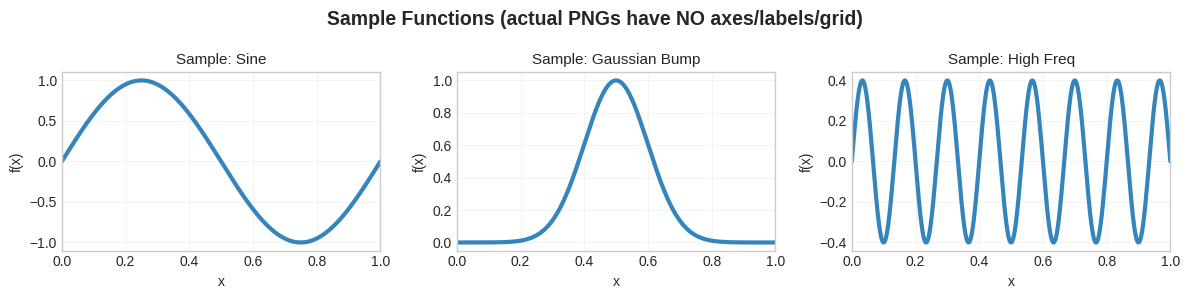


🎯 The actual PNG files have:
   ❌ No axes, labels, titles, or grids
   ❌ No background (transparent)
   ✅ Only the colored function curves
   ✅ Perfect for PowerPoint import


In [21]:
# Display a few samples to verify the minimal style
print("📺 Sample minimal plots (for verification):")

# Show 3 examples with different characteristics
samples = [
    ('sine', smooth_funcs['sine'], 'tab:blue'),
    ('gaussian_bump', smooth_funcs['gaussian_bump'], 'tab:blue'),
    ('high_freq', oscillatory_funcs['high_freq'], 'tab:blue')
]

fig, axes = plt.subplots(1, 3, figsize=(12, 3), facecolor='white')

for i, (name, y, color) in enumerate(samples):
    ax = axes[i]

    # Plot the same way as minimal function but with axes for display
    ax.plot(x, y, color=color, linewidth=3, alpha=0.9)
    ax.set_xlim(0, 1)

    # Calculate y-limits
    y_margin = 0.05 * (np.max(y) - np.min(y)) if np.max(y) != np.min(y) else 0.1
    ax.set_ylim(np.min(y) - y_margin, np.max(y) + y_margin)

    # Show axes for verification (actual files have no axes)
    ax.set_title(f'Sample: {name.replace("_", " ").title()}', fontsize=11)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('f(x)', fontsize=10)
    ax.grid(True, alpha=0.2)

plt.suptitle('Sample Functions (actual PNGs have NO axes/labels/grid)',
             fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\n🎯 The actual PNG files have:")
print("   ❌ No axes, labels, titles, or grids")
print("   ❌ No background (transparent)")
print("   ✅ Only the colored function curves")
print("   ✅ Perfect for PowerPoint import")